In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


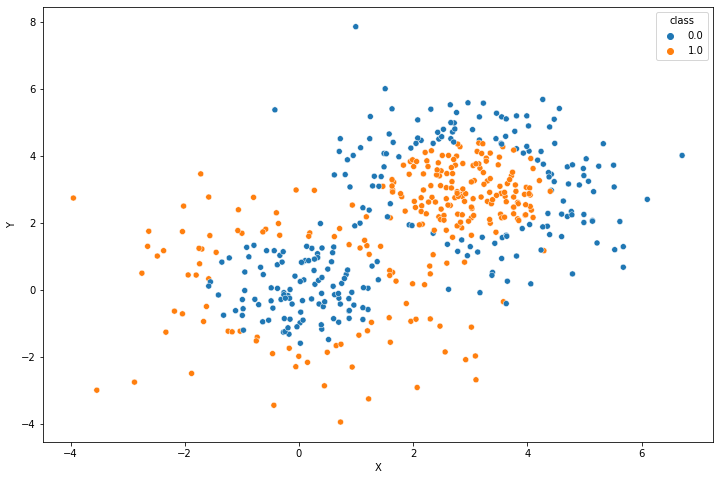

In [3]:
sns.scatterplot(circ['X'], circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [4]:
from sklearn.linear_model import LogisticRegression

### Your code is here
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

model_lr = LogisticRegression()

model_lr.fit(X, y)

LogisticRegression()

In [5]:
model_lr.score(X, y)

0.424

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [6]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

### Your code is here

all_clfs, acc_test, acc_train = [], [], []

for k in all_k:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    all_clfs.append(clf)
    
    acc_train.append(np.mean(clf.predict(X_train) == y_train))
    acc_test.append(np.mean(clf.predict(X_test) == y_test))
    
all_clfs

[KNeighborsClassifier(n_neighbors=1),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(n_neighbors=10),
 KNeighborsClassifier(n_neighbors=30),
 KNeighborsClassifier(n_neighbors=40),
 KNeighborsClassifier(n_neighbors=60)]

In [9]:
pd.DataFrame({'k' : all_k,
              'ACC Train' : acc_train,
              'ACC Test' : acc_test})

,k,ACC Train,ACC Test
0,1,1.0000,0.89
1,3,0.9475,0.87
2,10,0.9150,0.85
3,30,0.8525,0.74
4,40,0.8000,0.75
5,60,0.6925,0.73


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [10]:
!pip install mlxtend  

In [11]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

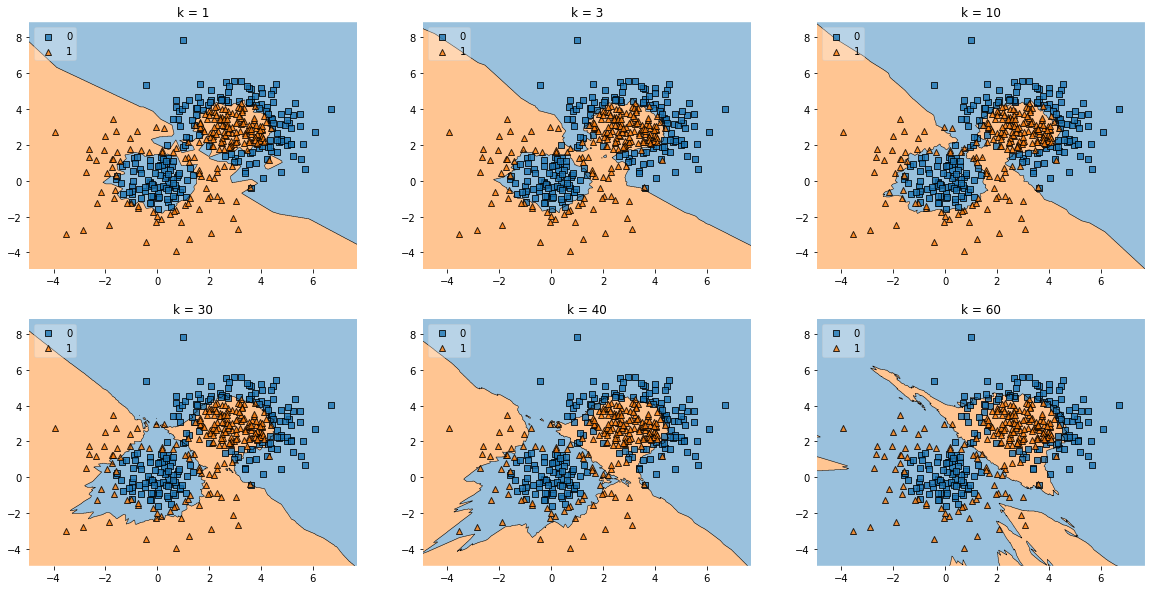

In [12]:
### Your code is here

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20,10))

labels = ['k = 1', 'k = 3', 'k = 10', 'k = 30', 'k = 40', 'k = 60']
for clf, lab, grd in zip(all_clfs,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd])
    fig = plot_decision_regions(X_train, y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()



1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [13]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [15]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

for k in [1, 5, 10]:
    pipeline = Pipeline([('scaler', StandardScaler()), ('kNN', KNeighborsClassifier(n_neighbors=k))])

    pipeline.fit(X_train, y_train)

    print(accuracy_score(y_test, pipeline.predict(X_test)))


0.5648805681084571
0.6303877264269168
0.6607678578209851


In [16]:
param_grid = {
    'n_neighbors': [1, 5, 10]
}

search = GridSearchCV(KNeighborsClassifier(), param_grid)
search.fit(X_train, y_train)

print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.354     0.300     0.325      5372
           2      0.479     0.628     0.544     11349
           3      0.529     0.379     0.442      9612

    accuracy                          0.470     26333
   macro avg      0.454     0.436     0.437     26333
weighted avg      0.472     0.470     0.462     26333



**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [ ]:
### Your code is here
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([('scaler', StandardScaler()), ('kNN', KNeighborsClassifier(p=1, n_neighbors=10))])

pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('housing.csv'
df.head()

In [ ]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [ ]:
### Your code is here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])

pipeline.fit(X_train, y_train)

mean_squared_error(y_test, pipeline.predict(X_test), squared=False)

In [ ]:
pipeline = Pipeline([('scaler', StandardScaler()), ('kNN', KNeighborsClassifier())])

param_grid = {
    'kNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]
}

search = GridSearchCV(pipeline, param_grid)
search.fit(X_train, y_train)

mean_squared_error(y_test, search.predict(X_test), squared=False)

In [ ]:
search.best_params_

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

for h in 𝑛𝑝.𝑎𝑟𝑎𝑛𝑔𝑒(0.02,0.1,0.01):
    
    def gauss_kernel(distances, h=h):
        const = 1 / (np.sqrt(2 * np.pi))
        power = (-1 / 2) * ((distances)**2) / h**2
    
        return const * np.exp(power)
    
    knn = KNeighborsRegressor(n_neighbors=9, weights=gauss_kernel)
    knn.fit(X_train, y_train)
    
    print(round(h, 3), mean_squared_error(y_test, knn.predict(X_test), squared=False))